<a href="https://colab.research.google.com/github/SrinithiSrinivasan/Fuzzy_Topsis/blob/master/Unparallel_FuzzyTopsis_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import copy
import time
start_time = time.time() 
#columns represent web services, in this case 100, and rows represent QoS parameters
A =[[8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8],
    [6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7],
    [8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5],
    [7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5,7,5,8,7,5],
    [8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6,8,5,6,7,6],
    [8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8],
    [6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7],
    [8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5],
    [8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8,8,7,7,6,8],
    [6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7,6,8,7,5,7],
    [8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5,8,7,6,6,5]]
for each in A:
   print(each)
print("------")  
B=A.copy()
c=0;
#normalization
for criteria in A:
    M=max(criteria)
    m=min(criteria)
    for ws in range(0,100):
        B[c][ws]=round((A[c][ws]-m)/(M-m),2)
    c+=1;
for each in B:
   print(each)
print("------")   
C=copy.deepcopy(B)
c=0
for criteria in B:
    M=max(criteria)
    m=min(criteria)
    for ws in range(0,100):
        C[c][ws]=(round((A[c][ws]-m)/(M-m)*(7-1)+1))
    c+=1;
#assigning linguistic variables
for each in C:
   print(each)
print("------")      
dic={1:'VL',2:'L',3:'ML',4:'M',5:'MH',6:'H',7:'VH'}
for each in C:
    for x in each:
        print(dic[x]+"\t",end="")
    print()
D=copy.deepcopy(C)
c=0
#assigning fuzzy numbers
for criteria in C:
    i=0
    for ws in criteria:
        if(ws==1):
            D[c][i]=[0,0,0.1]
        elif(ws==2):
             D[c][i]=[0,0.1,0.2]
        elif(ws==3):
             D[c][i]=[0.1,0.3,0.5]
        elif(ws==4):
             D[c][i]=[0.3,0.5,0.7]
        elif(ws==5):
             D[c][i]=[0.5,0.7,0.9]
        elif(ws==6):
             D[c][i]=[0.7,0.9,1]
        elif(ws==7):
             D[c][i]=[0.9,1,1]
        i+=1
    c+=1
#assigning weights
for each in D:
   print(each)
print("------") 
weight=[[0.3,0.5,0.7],[0.1,0.3,0.5],[0,0.1,0.3],[0.3,0.5,0.7],[0.1,0.3,0.5],[0,0.1,0.3],[0.3,0.5,0.7],[0,0.1,0.3],[0.1,0.3,0.5],[0,0.1,0.3],[0.1,0.3,0.5],[0,0.1,0.3],[0.1,0.3,0.5],[0,0.1,0.3],[0.1,0.3,0.5],[0.5,0.7,0.9],[0,0.1,0.3]] 
#multiplying weights and fuzzy numbers
E=copy.deepcopy(D)
i=0
for criteria in  D:
    ws=0
    for each in criteria:
        E[i][ws]=list(map(lambda x,y:round(x*y,2), D[i][ws],weight[i]))
        ws+=1
    i+=1
for each in E:
    print(each)

Astar=[1,1,1]
Aminus=[0,0,0]
#print(math.sqrt(pow(E[0][0][0]-Astar[0],2)+pow(E[0][0][0]-Astar[0],2)))

F1=copy.deepcopy(E)
F2=copy.deepcopy(E)
G1=copy.deepcopy(E)
G2=copy.deepcopy(E)

c=0

for criteria in E:
    ws=0
    for each in criteria:
        F2[c][ws]= round( math.sqrt(pow(F1[c][ws][0]-Astar[0],2) + pow(F1[c][ws][1]-Astar[1],2 )+ pow(F1[c][ws][2]-Astar[2],2)),2)
        
        ws+=1
    c+=1
print("------")
for each in F2:
    print(each)
c=0

for criteria in E:
    ws=0
    for each in criteria:
        G2[c][ws]= round( math.sqrt(pow(G1[c][ws][0]-Aminus[0],2) + pow(G1[c][ws][1]-Aminus[1],2 )+ pow(G1[c][ws][2]-Aminus[2],2)),2)
        
        ws+=1
    c+=1
print("------")
for each in G2:
    print(each)
#calculating di_plus and di_minus
di_plus=[]
di_minus=[]

for i in range(0,100):
    sum=0
    for j in F2:
        sum+=j[i]
    di_plus.append(round(sum,2))
    

for i in range(0,100):
    sum=0
    for j in G2:
        sum+=j[i]
    di_minus.append(round(sum,2))  
print("-----");        
print(di_plus)
print("-----"); 
print(di_minus)
#calculating cc_i
cc_i=[]
for i in range(0,100):
    cc_i.append(round(di_minus[i]/(di_minus[i]+di_plus[i]),2))
print("-----");        
print(cc_i)    
#measuring time
print("The best web service based on qos is: ws"+ str(cc_i.index(max(cc_i))+1))
print("--- %s seconds ---" % (time.time() - start_time))


    

    
        
       
    
   










    
        

    
        

        
    
    




[8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8, 8, 7, 7, 6, 8]
[6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7, 6, 8, 7, 5, 7]
[8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5, 8, 7, 6, 6, 5]
[7, 5, 8, 7, 5, 7, 5, 8, 7, 5, 7, 5, 8, 7, 5, 7, 5, 8, 7, 5, 7, 5, 8, 7, 5, 7, 5, 8, 7, 5, 7, 5, 

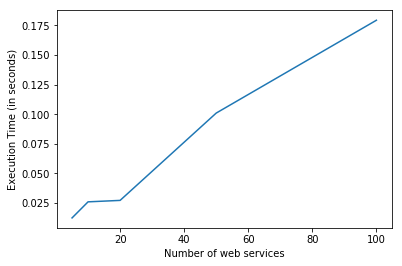

In [0]:
#process was repeated for 5,10,20,50 and 100 webservices and a graph was plotted
import matplotlib.pyplot as plt
x = [5,10,20,50,100]
y = [0.012539863586425781,0.02609395980834961,0.0273166618347168, 0.10094785690307617,0.17922472953796387]
plt.plot(x,y)
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Number of web services")
plt.show()